In [2]:
import pandas as pd
from biokit.viz import corrplot
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('Final_Dataset.csv', sep='\t')
df=df.drop('Unnamed: 0', axis=1)
df.head()

,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,...,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV
0,0,3,3,2,12.0,0.0,0.0,0.0,0.0,0.0,...,20676.000000,21980.000000,24681.0,0.1992,0.8608,0.54012,0.461533,0.27298,0.4633,0.0141
1,0,2,2,1,41.0,0.0,1.0,0.0,0.0,0.0,...,21999.500000,24233.000000,24231.0,0.6050,0.6538,0.54440,0.230767,0.20630,0.3058,0.3604
2,0,2,3,2,32.0,1.0,0.0,0.0,0.0,0.0,...,23323.000000,26486.000000,23781.0,0.9048,0.4468,0.54860,0.000000,0.25940,0.9249,0.1294
3,0,3,4,3,12.0,0.0,0.0,0.0,0.0,0.0,...,23408.000000,27628.000000,23331.0,0.6922,0.4400,0.55280,0.125000,0.31250,0.7304,0.6109
4,0,2,2,1,32.0,0.0,0.0,0.0,0.0,0.0,...,23832.666667,26274.333333,22881.0,0.4928,0.4823,0.55700,0.250000,0.36560,0.2128,0.2896


In [4]:
#After applying Interpolate Checking the number of Null Values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

HCM2            0
PREDDEG         0
HIGHDEG         0
CONTROL         0
LOCALE          0
HBCU            0
PBI             0
ANNHI           0
TRIBAL          0
AANAPII         0
HSI             0
NANTI           0
MENONLY         0
WOMENONLY       0
RELAFFIL        0
SATVR25         0
SATVR75         0
SATMT25         0
SATMT75         0
SATWR25         0
SATWR75         0
SATVRMID        0
SATMTMID        0
SATWRMID        0
ACTCM25         0
ACTCM75         0
ACTEN25         0
ACTEN75         0
ACTMT25         0
ACTMT75         0
ACTWR25         0
ACTWR75         0
ACTCMMID        0
ACTENMID        0
ACTMTMID        0
ACTWRMID        0
SAT_AVG         0
SAT_AVG_ALL     0
PCIP01          0
PCIP03          0
PCIP04          0
PCIP05          0
PCIP09          0
PCIP10          0
PCIP11          0
PCIP12          0
PCIP13          0
PCIP14          0
PCIP15          0
PCIP16          0
PCIP19          0
PCIP22          0
PCIP23          0
PCIP24          0
PCIP25          0
PCIP26    

In [5]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


### Performing a Normality Test on students who stay in college for four years courses (RET_FT4)  

C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


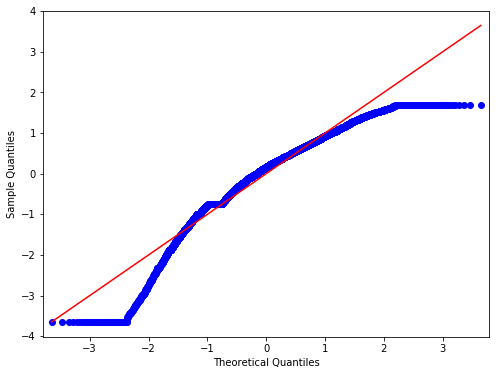

In [6]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab


Full_Time_Four_Years=df['RET_FT4'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

In [7]:
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF


df_Full_Time_Four_Years = df[['RET_FT4']]
stats.normaltest(df_Full_Time_Four_Years)

NormaltestResult(statistic=array([ 1213.95615264]), pvalue=array([  2.47042013e-264]))

##### Since the p-Value obtained is < 0.055 hence we can conclude that the data is not normally distributed.

## Performing another Normality Test (Kolmogorov-Smirnov test) to verify if data is normally distributed

### Performing a Normality Test on students retention rate of students who stay in college for less than four years Courses (RET_FT4).

##### Here our Null Hypothesis is that our data is Normally Distributed.

In [9]:
# Kolmogorov-Smirnov test for Body Temperature Of Males: Fairly conservative
RET_FT4 = stats.kstest(df_Full_Time_Four_Years, 'norm', mode='asymp') # mode opts: 'approx'. Dist can be any in scipy.stats
print("For retention rate of students who stay in college for less than four years Courses Normality is=",RET_FT4)

For retention rate of students who stay in college for less than four years Courses Normality is= KstestResult(statistic=0.84134474606854293, pvalue=0.0)


###### Since P-Value is belo 0.1 hence our Null Hypothesis is false.

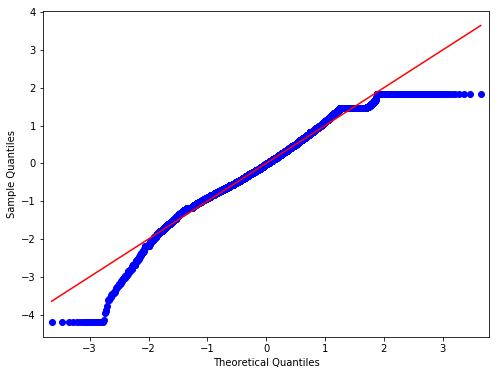

In [10]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab


Full_TimeLess_Than4_Years=df['RET_FTL4'].values
X_scaled = preprocessing.scale(Full_TimeLess_Than4_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

In [11]:
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF


df_Full_TimeLess_Than4_Years = df[['RET_FTL4']]
stats.normaltest(Full_TimeLess_Than4_Years)

NormaltestResult(statistic=305.97574626369777, pvalue=3.6158541198423725e-67)

###### Since the p-Value obtained is < 0.055 hence we can conclude that the data is not normally distributed.

## Performing another Normality Test (Kolmogorov-Smirnov test) to verify if data is normally distributed¶

In [12]:
# Kolmogorov-Smirnov test for Body Temperature Of Males: Fairly conservative
RET_FTL4 = stats.kstest(df_Full_TimeLess_Than4_Years, 'norm', mode='asymp') # mode opts: 'approx'. Dist can be any in scipy.stats
print("For retention rate of students who stay in college for less than four years Courses Normality is=",RET_FTL4)

For retention rate of students who stay in college for less than four years Courses Normality is= KstestResult(statistic=0.84134474606854293, pvalue=0.0)


###### Since P-Value is belo 0.1 hence our Null Hypothesis is false.

# Performing Hypothesis Test

In [13]:
#In order to hypothesize a problem, we are trying to check what is the difference in mean of students 
#who complete four year in college 
#as opposed to those students don't complete four years. 
Full_Time_Four_Years=df['RET_FT4'].values
Full_TimeLess_Than4_Years=df['RET_FTL4'].values

#Subtracting the Mean of both groups of students
np.mean(Full_TimeLess_Than4_Years) - np.mean(Full_Time_Four_Years)

0.012844318871159333

##### Null Hypothesis: The true mean of retention rate of students who stay in college for four years is equal to retention rate of students who stay in college for less than four years.

In [14]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [15]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(Full_TimeLess_Than4_Years,Full_TimeLess_Than4_Years)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Full_Time_Four_Years,Full_TimeLess_Than4_Years,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
print("P-Value is =",p)

P-Value is = 0.5037


##### FINAL INFERENCE: We ge a P-Value of 0.49 which suggests that it is quite possible that the two groups of students (who have 4 year course length as opposed to who donot have 4 years of course length) donot have any fundamental difference in their measurement. 

###### NOTE: Here we report the fraction of bootstrap replicates that are less than or equal to the test statistic. In this case, we use less than because the mean from student who complete four year in college was less than who don't complete four years.   

## T-Tests between students who complete four year in college (RET_FT4) as opposed to those students don't complete four years (RET_FTL4).

###### The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

In [16]:
Full_Time_Four_Years=df['RET_FT4'].values
Full_TimeLess_Than4_Years=df['RET_FTL4'].values

# t-test of paired samples
ttest_Retention_Rate = stats.ttest_rel(Full_Time_Four_Years, Full_TimeLess_Than4_Years, nan_policy='omit')
print(ttest_Retention_Rate)

Ttest_relResult(statistic=-4.3319606408694629, pvalue=1.4969204095613392e-05)


#### Since we have a very low P-Value hence we can conclude that our Null Hypothesis is false.

## Visually observing the correlation between the two quantities

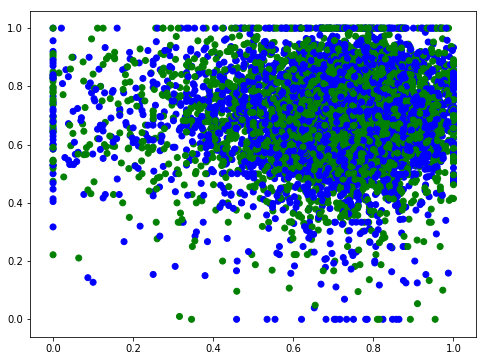

In [21]:
plt.scatter(Full_Time_Four_Years,Full_TimeLess_Than4_Years,color=['blue','green'])
plt.show()

### After visually interpretting the above scatter plot we can clearly observe that the means of the data donot vary from each other. 

###### The reason why we got a wrong result from the T-Test is because a Paired T-Test is used to determine whether the mean of a dependent variable (e.g., weight, anxiety level, salary, reaction time, etc.) is the same in two related groups (e.g., two groups of participants that are measured at two different "time points" or who undergo two different "conditions"). For example, you could use a paired t-test to understand whether there was a difference in managers' salaries before and after undertaking a PhD (i.e., your dependent variable would be "salary", and your two related groups would be the two different "time points"; that is, salaries "before" and "after" undertaking the PhD).
###### Since in our case we are dealing with two independent variables, hence Paired T-Test is not a recommended test. 

## Now we perform an unpaired T-Test on the above two variables

##### NULL HYPOTHESIS: The unpaired t method tests the null hypothesis that the population means related to two independent, random samples from an approximately normal distribution are equal.

In [22]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [28]:
from scipy.stats import ttest_ind
ttest_ind(Full_Time_Four_Years,Full_TimeLess_Than4_Years)

Ttest_indResult(statistic=-4.4672162520395666, pvalue=7.9817087751759088e-06)

#### The reason for low P-Value is because two distributions are not normally distributed which the NULL HYPOTHESIS assumes hence it is rejected. 

In [ ]:
d = df.corr()

In [ ]:
def get_redundant_pairs(d):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = d.columns
    for i in range(0, d.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(d, n=5):
    au_corr = d.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(d)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(d, 50))
t=get_top_abs_correlations(d, 100)

##### Identify Highly Correlated Features to drop

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)] 


#List the columns to be droped
to_drop

##### Above listed are the highly marked corelated features 